<a href="https://colab.research.google.com/github/mandelatrey/ML/blob/main/Linear_regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Worflow

In [ ]:
import torch
from torch import nn # creates all of pytorch's building blocks for new nural graphs
import matplotlib as plt
from matplotlib import *

torch.__version__

'1.13.1+cu116'

#Data(preparing selcted date)

data can be of any type

1. get data into numerical structure
2. build the model

In [ ]:
#create *known* parameters
weight = 0.7
bias = 0.3

#create tensor
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
len(X), len(y)

(50, 50)

#Splitting data into training, validation and testing set

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#Visualising data

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.pyplot.Figure(figsize=(10, 7))

  # Plot training data in blue
  plt.pyplot.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.pyplot.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.pyplot.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.pyplot.legend(prop={"size": 12});

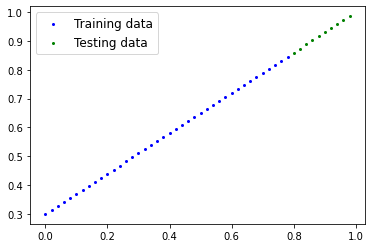

In [ ]:
plot_predictions()

#Building the model


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                            requires_grad=True)
                    
    
    self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                                        requires_grad=True)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
          return self.weights * x + self.bias

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_O = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
model_O.state_dict()

list(model_O.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#making predictions with the
with torch.inference_mode():
  y_preds = model_O(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

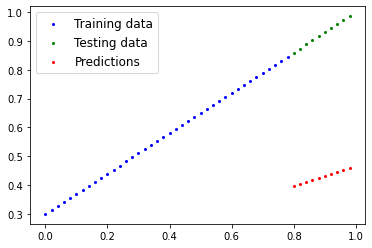

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#setup a loss fuction
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_O.parameters(),
                            lr=0.01) #lr = learning rate

###BUILDING A TRAINING LOOP(and a testing loop) in Pytorch

0. Loop through the data
1. Forward Pass (using the data moving through our model's forward()
2. Calculate the loss (compare forward pass predictions to ground truth labels
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of the loss
5. optimiser step - use the optimiser to adjust our model's paramteres to try and improve 

In [ ]:
with torch.inference_mode():
  list(model_O.parameters())

In [ ]:
#an epoch is one loop through the data...(this is a ypermeter because we've set it)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #set the model to training mode
  model_O.train() #sets all parameters that require grads to require grads

  #1 forward pass
  y_pred = model_O(X_train)

  #calc the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  
  #optimizer zero grad
  optimizer.zero_grad()

  #perform back propagation on the loss with respect to the pars of the model
  loss.backward()
  
  #step the optimizer
  optimizer.step()

  model_O.eval() #turns off grad tracking
  with torch.inference_mode():
    test_pred = model_O(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

  print(model_O.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.19767

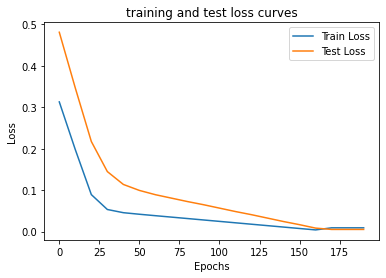

In [ ]:

import numpy as np
#plot the loss curves 

plt.pyplot.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.pyplot.plot(epoch_count, test_loss_values, label="Test Loss")
plt.pyplot.title("training and test loss curves")
plt.pyplot.ylabel("Loss")
plt.pyplot.xlabel("Epochs")
plt.pyplot.legend();


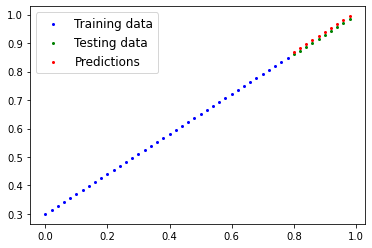

In [ ]:
with torch.inference_mode():
  y_preds_new = model_O(X_test)

y_preds_new

plot_predictions(predictions=y_preds_new)

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#saving the model

from pathlib import Path

#creating the model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#creating hte model save path
MODEL_NAME = "01_TM_MML.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_O.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/01_TM_MML.pth


In [ ]:
model_O


LinearRegressionModel()